# Assignment 3: Clustering - Group 4

|  <font size=4>Name</font>  | <font size=4>Working Hours</font>   |
|  :----  | :----  |
| <font size=4>Dimitrios Koutsakis</font>   | <font size=4>8</font> |
| <font size=4>Bingcheng Chen</font>  | <font size=4>8</font> |

## Question 1

**Import Libraries**

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

**Load dataset**

In [18]:
df = pd.read_csv('data_assignment3.csv')

df.head()

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520


**Plot the dataset**

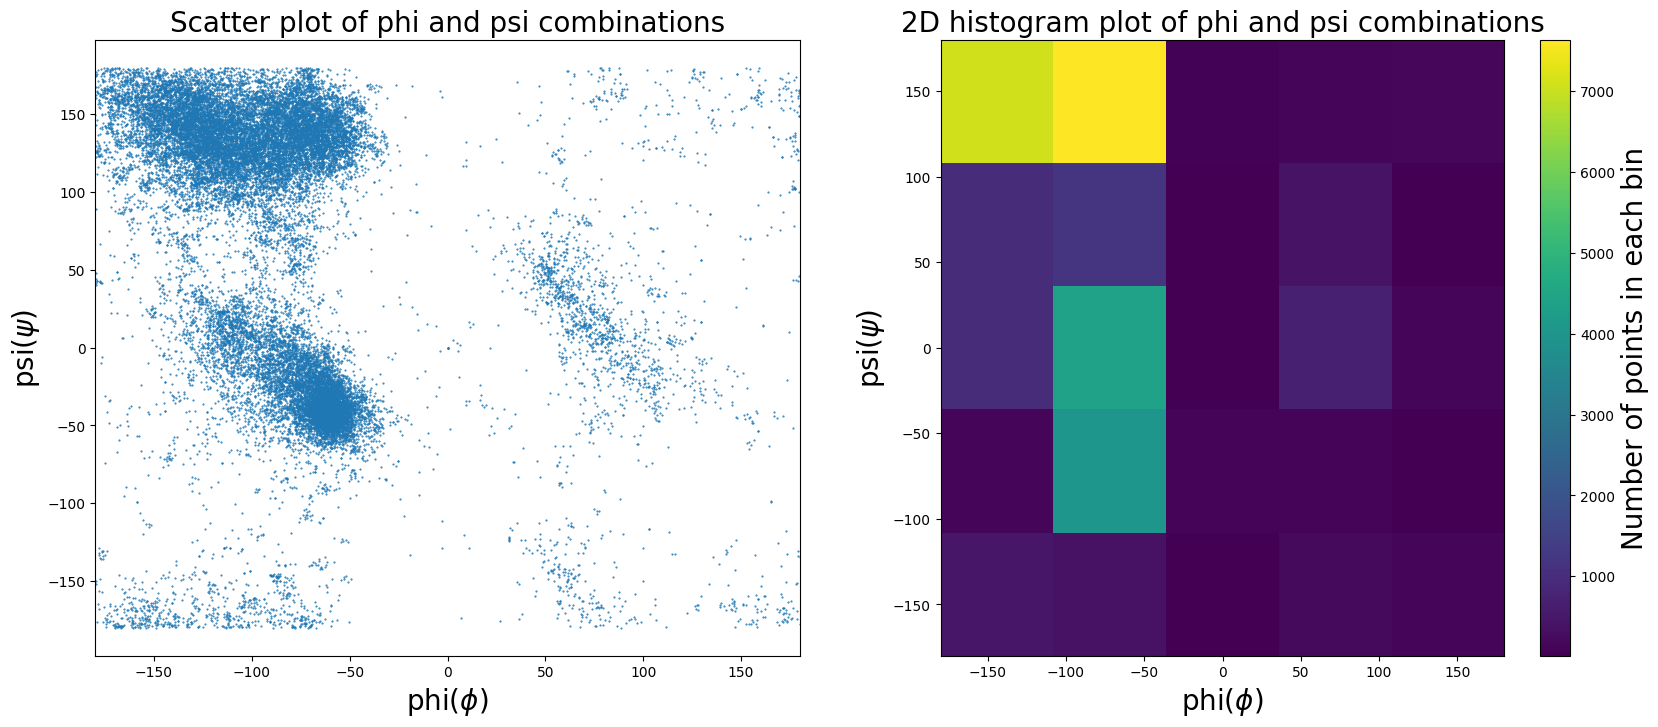

In [55]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))

ax[0].scatter(df['phi'], df['psi'], marker='.', s=1)
ax[0].set_xlabel('phi($\phi$)',fontsize=20)
ax[0].set_ylabel('psi($\psi$)',fontsize=20)
ax[0].set_xlim(-180,180)
ax[0].set_xlim(-180,180)
ax[0].set_title('Scatter plot of phi and psi combinations', fontsize=20)

h = ax[1].hist2d(df['phi'], df['psi'], bins=5,cmap='viridis')
ax[1].set_xlabel('phi($\phi$)',fontsize=20)
ax[1].set_ylabel('psi($\psi$)',fontsize=20)
ax[1].set_xlim(-180,180)
ax[1].set_xlim(-180,180)
ax[1].set_title('2D histogram plot of phi and psi combinations', fontsize=20)

cbar = fig.colorbar(h[3], ax=ax[1])
cbar.set_label('Number of points in each bin',fontsize=20)

In [54]:
h[3]